# Predicting the City of Nairobi Air Temperature using Scikit Learn
![Nairobi](https://github.com/mwemaphil/Nairobi_City_Air_Temperature_Predictive_Analytics/assets/45120853/62b0284b-7888-4e2a-a43a-ee97810af6d3)

This is an analysis of the Air Temperature levels of the City of Nairobi as read from various sensors situated across the city. The data has been acquired from [AfricaOpenData](https://africaopendata.org/dataset/sensorsafrica-airquality-archive-nairobi). The values from the datasets include sensored data of different types, i.e. Particulate Matter denoted as P0, P1, and P2, Humidity, and Temperature. For this exercise, we will concentrate on temperature values to create a predictive model to be able to predict the temperature around the City of Nairobi.
Model prediction using LinearRegression utilized sensor data of temperature from the previous 6 months to create predictive trained models and utilized OOctober data which is the current month as of creation of this notebook, to test the trained models.



        This analysis and predictive model was built by  Philip Mwema.
        Tools Used --> Python - pandas, numpy, pytz, matplotlib, and scikit-learn libraries

### Importing Libraries

In [172]:
#Imporing the required Libraries needed

import pandas as pd
import numpy as np
import pytz
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

### Loading data

In [173]:
#Loading data for the lat six months acquired from AfricaOpenData in csv format

apr = pd.read_csv('data/April 2023 Sensor Data.csv', sep = ';')
may = pd.read_csv('data/May 2023 Sensor Data.csv', sep = ';')
june = pd.read_csv('data/June 2023 Sensor Data.csv', sep = ';')
july = pd.read_csv('data/July 2023 Sensor Data.csv', sep = ';')
aug = pd.read_csv('data/August 2023 Sensor Data.csv', sep = ';')
sept = pd.read_csv('data/September 2023 Sensor Data.csv', sep = ';')

In [174]:
#Exploring the loaded datasets
apr.sample(1)


,sensor_id,sensor_type,location,lat,lon,timestamp,value_type,value
398496,49,pms5003,3573,-1.289,36.825,2023-04-18T22:09:58.962383+00:00,P0,4.0


In [175]:
may.sample(1)

,sensor_id,sensor_type,location,lat,lon,timestamp,value_type,value
331933,49,pms5003,3573,-1.289,36.825,2023-05-18T00:33:09.088787+00:00,P1,3.0


In [176]:
june.sample(1)

,sensor_id,sensor_type,location,lat,lon,timestamp,value_type,value
625883,50,DHT22,3573,-1.289,36.825,2023-06-18T04:38:16.435757+00:00,temperature,15.8


In [177]:
july.sample(1)

,sensor_id,sensor_type,location,lat,lon,timestamp,value_type,value
733195,49,pms5003,3573,-1.289,36.825,2023-07-25T07:36:17.595495+00:00,P1,18.2


In [178]:
aug.sample(1)

,sensor_id,sensor_type,location,lat,lon,timestamp,value_type,value
853288,50,DHT22,3573,-1.289,36.825,2023-08-26T18:13:01.649160+00:00,temperature,21.1


In [179]:
sept.sample(1)

,sensor_id,sensor_type,location,lat,lon,timestamp,value_type,value
366527,50,DHT22,3573,-1.289,36.825,2023-09-16T08:26:53.937903+00:00,temperature,29.9


> The loaded files have the same structure in terms of columns, so we'll go ahead and join them together and have one DataFrame to work with

In [180]:
frames = [apr, may, june, july, aug, sept]
data = pd.concat(frames, axis = 0)

### Inspecting and Cleaning Dataset

In [181]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4847888 entries, 0 to 634583
Data columns (total 8 columns):
 #   Column       Dtype  
---  ------       -----  
 0   sensor_id    int64  
 1   sensor_type  object 
 2   location     int64  
 3   lat          float64
 4   lon          float64
 5   timestamp    object 
 6   value_type   object 
 7   value        float64
dtypes: float64(3), int64(2), object(3)
memory usage: 332.9+ MB


In [182]:
#Convert timestamp to Date type and Localize to Nairobi Time Zone

data['timestamp'] = pd.to_datetime(data['timestamp']).dt.tz_convert('Africa/Nairobi')

In [183]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4847888 entries, 0 to 634583
Data columns (total 8 columns):
 #   Column       Dtype                         
---  ------       -----                         
 0   sensor_id    int64                         
 1   sensor_type  object                        
 2   location     int64                         
 3   lat          float64                       
 4   lon          float64                       
 5   timestamp    datetime64[ns, Africa/Nairobi]
 6   value_type   object                        
 7   value        float64                       
dtypes: datetime64[ns, Africa/Nairobi](1), float64(3), int64(2), object(2)
memory usage: 332.9+ MB


> From the combined dataset we have a total of ``4,847,888`` data points collected across the sensors around the city for the last 6 months. For this project we will only focus on the temperature data, hence we'll filter the data down to temperature level to create a model to predict the temperature levels around the City of Nairobi.


In [184]:
data['value_type'].unique()

array(['P2', 'P1', 'P0', 'humidity', 'temperature'], dtype=object)

In [185]:
#Filtering down to temperature level

temp_data = data[data['value_type'] == 'temperature']

In [186]:
#Dropping all the other columns that are not necessary for this exercise, remaining with only the data/time columns and the value of temperature

temp = temp_data[['timestamp', 'value']]

In [187]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 956895 entries, 4 to 634581
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype                         
---  ------     --------------   -----                         
 0   timestamp  956895 non-null  datetime64[ns, Africa/Nairobi]
 1   value      956895 non-null  float64                       
dtypes: datetime64[ns, Africa/Nairobi](1), float64(1)
memory usage: 21.9 MB


In [188]:

temp.describe()

,value
count,956895.000000
mean,434.665516
std,5182.049476
min,0.000000
25%,18.600000
50%,22.000000
75%,25.000000
max,65535.000000


> From above there are outliers in the values of temperature as it's not normal to have a temperature of 0 degrees and over 65,000 degrees in Nairobi, Kenya.
Next steps will involve removing these outliers.

In [189]:
#Investigating the value with 0 as temperature value

(temp['value'] < 10).sum()

1

In [190]:
#Dropping the 1 value with a value of 0 as temperature

temp = temp[temp['value'] != 0]

In [191]:
(temp.value == 65535.000000).sum()

6025

In [192]:
#Dropping unrealistic high values of 65535 as the temperature values
temp = temp[temp['value'] != 65535]

In [193]:
#Testing the cleaned data

temp.describe()

,value
count,950869.000000
mean,22.170124
std,4.397608
min,12.500000
25%,18.600000
50%,22.000000
75%,25.000000
max,40.600000


> From the cleaned dataset we have a total of 950,869 data points with a mean temperature of 22.17 degrees, with lowest and highest temperature ever recorded being 12.5 and 40.6 degrees respectively which are more realistic for the temperature ranges in the CIty of Nairobi.

### Exploratory Data Analysis

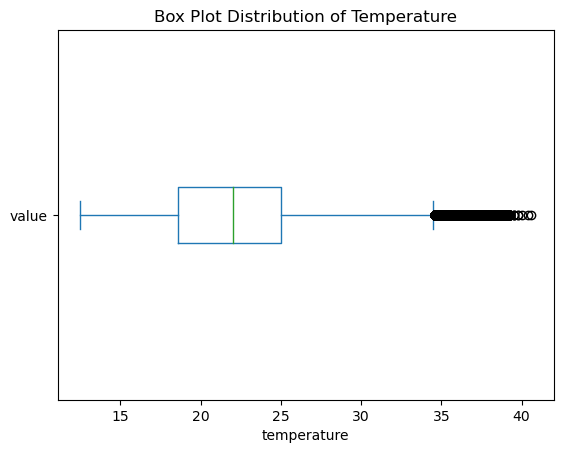

In [194]:
#Boxplot to identify Outliers

temp['value'].plot(kind = 'box', vert = False)
plt.title('Box Plot Distribution of Temperature')
plt.xlabel('temperature');

Text(0, 0.5, 'temperature')

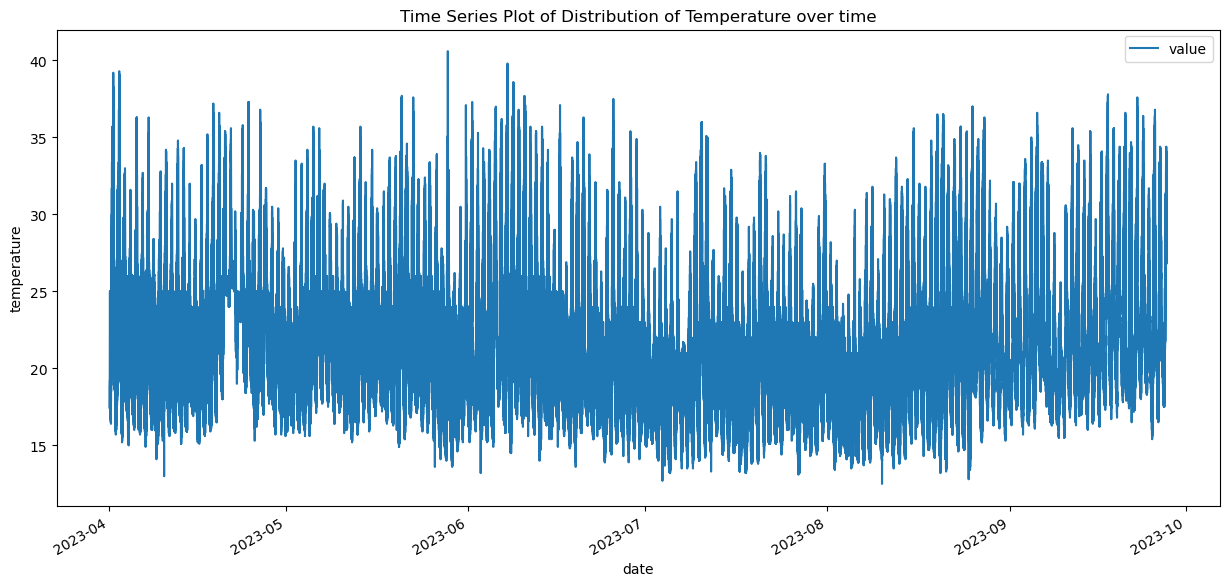

In [195]:
#TIme Series Plot on Distribution of Temperature over time

temp.plot(x = 'timestamp', y = 'value', figsize = (15, 7))
plt.title('Time Series Plot of Distribution of Temperature over time')
plt.xlabel('date')
plt.ylabel('temperature')

In [196]:
#Setting datetime as the Index

temp = temp.set_index('timestamp')

In [197]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 950869 entries, 2023-04-01 03:00:04.275083+03:00 to 2023-09-27 16:12:46.703602+03:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   value   950869 non-null  float64
dtypes: float64(1)
memory usage: 14.5 MB


In [198]:
temp.head()

,value
timestamp,
2023-04-01 03:00:04.275083+03:00,19.2
2023-04-01 03:00:37.002522+03:00,19.3
2023-04-01 03:00:52.042386+03:00,17.4
2023-04-01 03:01:09.075692+03:00,19.3
2023-04-01 03:01:29.232361+03:00,25.0


> We will resample the data to have a uniform window of one hour using the mean values with which it results to jst 4,310 data points meaning we have just ove 4,000 hours between the six months from April to September 2023.

In [199]:
#Resampling to Hourly Window Reading for easier prediction

temp = temp['value'].resample("1H").mean().round(2).to_frame()

In [200]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4310 entries, 2023-04-01 03:00:00+03:00 to 2023-09-27 16:00:00+03:00
Freq: H
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   4310 non-null   float64
dtypes: float64(1)
memory usage: 67.3 KB


In [201]:
temp.head()

,value
timestamp,
2023-04-01 03:00:00+03:00,19.60
2023-04-01 04:00:00+03:00,19.36
2023-04-01 05:00:00+03:00,19.08
2023-04-01 06:00:00+03:00,19.26
2023-04-01 07:00:00+03:00,21.99


> Since we only have one data point, which is not possible to create effective models to predict values, we'll have to come up with a clever way to generate a column which we can use to predict the temperature values. In this case we'll create a new column based on the temperature values of the previous hour, i.e we'll try and create a model that uses the previous hour temperature to predict the next hour's reading. This will be created through a lag feature.

In [202]:
#Creating a Lag feature for temperature values 
#Named the new columns value.1 as it's the previous hour temperature reading

temp['value.1'] = temp['value'].shift(1)

In [203]:
temp.head()

,value,value.1
timestamp,,
2023-04-01 03:00:00+03:00,19.60,NaN
2023-04-01 04:00:00+03:00,19.36,19.60
2023-04-01 05:00:00+03:00,19.08,19.36
2023-04-01 06:00:00+03:00,19.26,19.08
2023-04-01 07:00:00+03:00,21.99,19.26


In [204]:
# Dropping the first null value caused due to the shift downwards from the shift

temp = temp.dropna()
temp.head()

,value,value.1
timestamp,,
2023-04-01 04:00:00+03:00,19.36,19.60
2023-04-01 05:00:00+03:00,19.08,19.36
2023-04-01 06:00:00+03:00,19.26,19.08
2023-04-01 07:00:00+03:00,21.99,19.26
2023-04-01 08:00:00+03:00,23.50,21.99


In [205]:
#Correlation matrix for the both values

temp.corr()

,value,value.1
value,1.000000,0.948501
value.1,0.948501,1.000000


Text(0.5, 1.0, 'Correlation Scatter Plot of the Values')

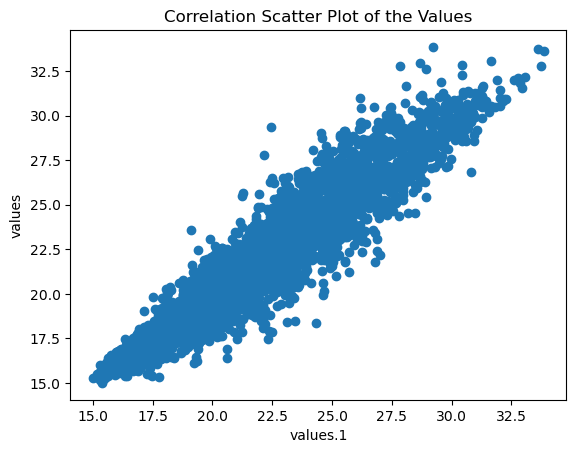

In [206]:
plt.scatter(x = temp['value'], y = temp['value.1'])
plt.xlabel('values.1')
plt.ylabel('values')
plt.title('Correlation Scatter Plot of the Values')

> This is a positive correlation between the two values and it's a good indication that LiinearRegression Model will be ideal in predicting the temperature values.

### SPLITTING

In [207]:
#Training Data

target  = 'value' #The Values we're trying to predict

X_train = temp.drop(columns = 'value') #Values we'll use to train our model in DataFrame format
y_train = temp[target] #The Values we're trying to predict in series format

In [208]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(y_train)

In [209]:

mae = mean_absolute_error(y_train, y_pred_baseline)

print('Mean Temperature Values is', y_mean)
print('Baseline MAE is: ', mae)

Mean Temperature Values is 21.743244372244142
Baseline MAE is:  3.1411275218216193


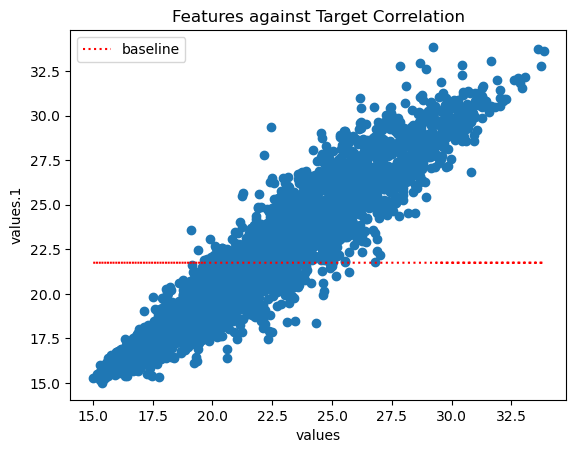

In [210]:
plt.scatter(temp['value'], temp['value.1'])
plt.plot(X_train.values, y_pred_baseline, color = 'red', label = 'baseline', linestyle = 'dotted')
plt.xlabel('values')
plt.ylabel('values.1')
plt.title('Features against Target Correlation')
plt.legend();

> From above split assignment, we've assigned normal temperature reading as the target (this is what our model will try to predict after training) to ``y_train``, and assigned the lag temperature to ``X_train`` which will be used as a feature to train the model. The ``baseline mean`` is ``21.75`` while the ``mean_absolute_error`` is ``3.14`` which is what we will try to beat after training in order to have efficient prediction. The ``MAE`` after training should be less than the current ``MAE`` and close to ``0 (zero)`` as possible for an efficient model.

### Model

In [211]:
#Instantiate the Model

model = LinearRegression()

In [212]:
#Training the Model

model.fit(X_train, y_train)

LinearRegression()

In [213]:
#Predicting the values using the feature

y_pred_training = model.predict(X_train)
y_pred_training[:5] #Displaying the first 5 predictions

array([19.71163753, 19.48394612, 19.21830615, 19.3890747 , 21.97906447])

In [214]:
#Calculating the MAE of training to compare with our initial MAE

mae_training = mean_absolute_error(y_train, y_pred_training)
mae_training

0.9149510027540607

> The training ``Mean Absolute Error`` is great as it's less than the original data's ``MAE`` and is close to 1, hence this is a great model.

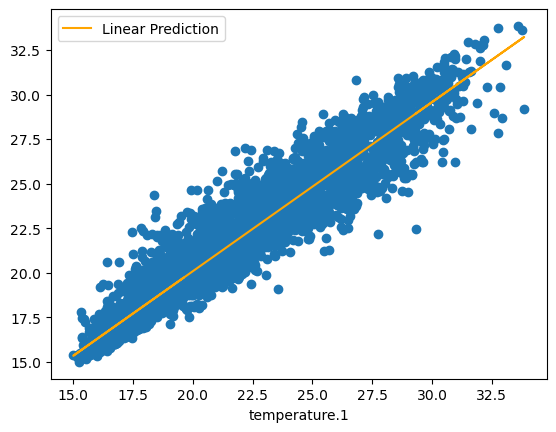

In [215]:
#Plotting a Scatter Graph with The Predictions

plt.scatter(X_train, y_train)
plt.plot(X_train.values, y_pred_training, color = 'orange', label = 'Linear Prediction')
plt.xlabel('temperature')
plt.xlabel('temperature.1')
plt.legend();

#### Testing Model

In [216]:
#Loading test data which is current month's data as of the recording of this notebook on 12th October 2023

test_data = pd.read_csv('data/October 2023 Sensor Data.csv', sep = ';')

In [217]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274526 entries, 0 to 274525
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   sensor_id    274526 non-null  int64  
 1   sensor_type  274526 non-null  object 
 2   location     274526 non-null  int64  
 3   lat          274526 non-null  float64
 4   lon          274526 non-null  float64
 5   timestamp    274526 non-null  object 
 6   value_type   274526 non-null  object 
 7   value        274526 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 16.8+ MB


We'll go ahead clean and trim the data to have the same structure as out training data

In [218]:
test_data['timestamp'] = pd.to_datetime(test_data['timestamp']).dt.tz_convert('Africa/Nairobi')
test_data = test_data[test_data['value_type'] == 'temperature']
test_data = test_data[['timestamp', 'value']]

In [219]:
test_data = test_data.set_index('timestamp')
test_data = test_data['value'].resample("1H").mean().round(2).to_frame()
test_data['value.1'] = test_data['value'].shift(1)
test_data = test_data.dropna()

In [220]:
test_data.describe()

,value,value.1
count,272.000000,272.000000
mean,23.268934,23.229706
std,4.831856,4.829283
min,15.710000,15.710000
25%,18.780000,18.747500
50%,22.220000,22.180000
75%,27.402500,27.235000
max,34.580000,34.580000


> Splitting and Training the Test Data

In [221]:
#Splitting the Test Data

test_target = 'value'  #The Values we're trying to predict

X_test = test_data.drop(columns='value')  #Values we'll use to train our model in DataFrame format
y_test = test_data[test_target]  #The Values we're trying to predict in series format

In [222]:
#Training the Data
model.fit(X_test, y_test)


LinearRegression()

In [223]:
#Prediciting the Values

test_prediction = model.predict(X_test)
test_prediction[:5] #Displaying the first 5 predictions


array([18.53898088, 18.24570654, 17.78214389, 18.06595776, 18.34977163])

In [224]:
test_prediction_mae = mean_absolute_error(y_test, test_prediction)
test_prediction_mae

1.256222974810873

> The model works on the Test Dataset too, and although it has a higher ``Mean Absolute Value`` than the training data it's still lower than the original data's ``MAE``. 

### Communicating the Results

In [225]:
# Formula for the Linear Model

intercept = model.intercept_
coefficient = model.coef_

print(f"Next Temperature = {intercept} + ({coefficient} * Previous Temperature)")

Next Temperature = 1.2925579406357706 + ([0.94604624] * Previous Temperature)


> The above formula calculates or rather predicts the next hour's temperature from the coefficient, and intercept as developed from the prediction model and, utilizing the previous temperature.

In [226]:
# Creating a DataFrame for the Test Predictions

test_dataframe = pd.DataFrame(
    {
        "y_test": y_test,
        "test_prediction": test_prediction
    }
    
)

In [227]:
#Investigating the DataFrame

test_dataframe.head()

,y_test,test_prediction
timestamp,,
2023-10-01 04:00:00+03:00,17.92,18.538981
2023-10-01 05:00:00+03:00,17.43,18.245707
2023-10-01 06:00:00+03:00,17.73,17.782144
2023-10-01 07:00:00+03:00,18.03,18.065958
2023-10-01 08:00:00+03:00,18.87,18.349772


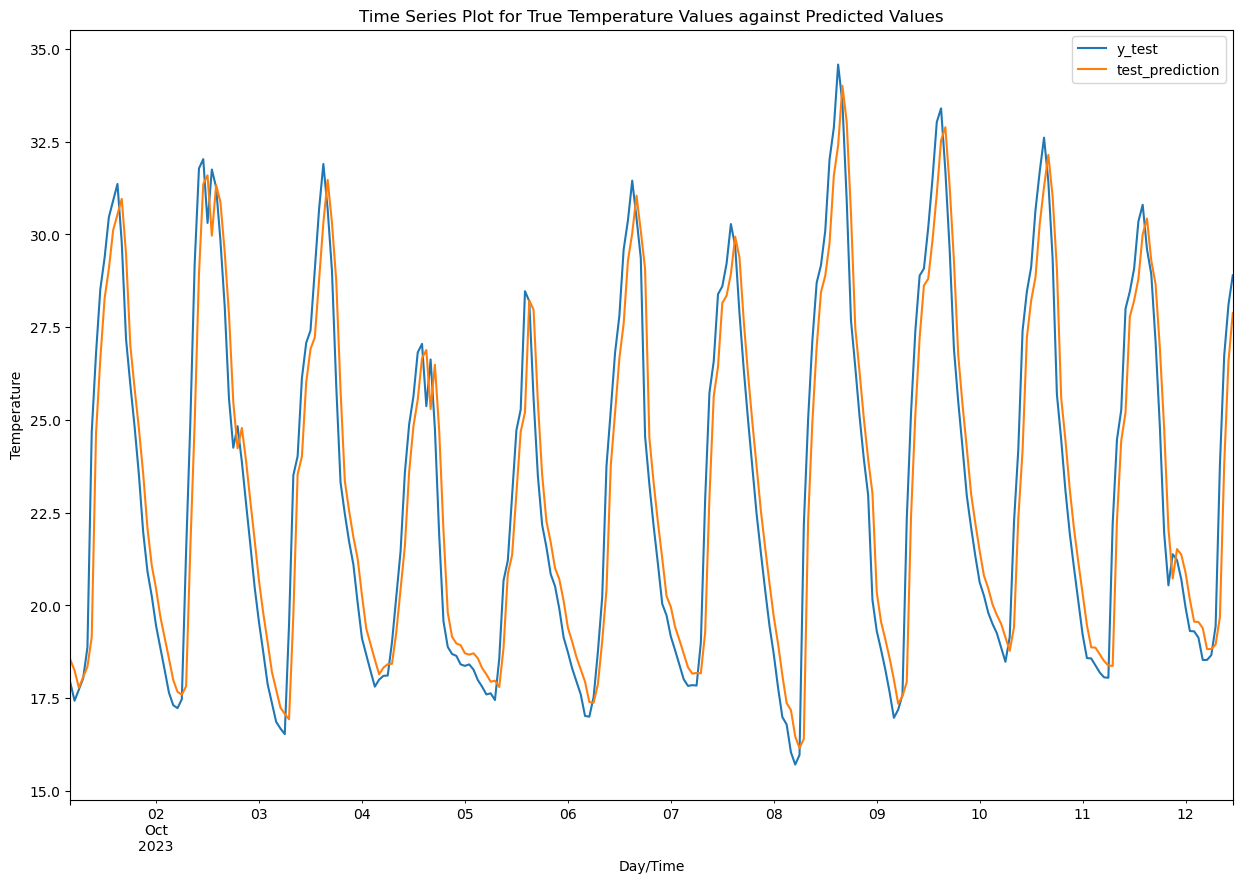

In [228]:
#Plotting the True Values against the Predicted Lables in a Time Series Plot

test_dataframe.plot(figsize = (15, 10))
plt.title('Time Series Plot for True Temperature Values against Predicted Values')
plt.xlabel('Day/Time')
plt.ylabel('Temperature')
plt.legend();